# Library Installations

In [1]:
# Library Installations

# !pip install pypyodbc
# !pip install numpy
# !pip install pandas


# Library Imports

In [2]:
# Imports

import pypyodbc as odbc # pip install pypyodbc
import numpy as np # pip install numpy
import pandas as pd # pip install pandas

# Connecting To Database

## Creating Connection String

In [3]:
# Connect to database

DRIVER_NAME =   "SQL SERVER"
SERVER_NAME = "LAPTOP-KBAD6AQA\SQLEXPRESS"
DATABASE_NAME = 'Netflix'

connection_string = f"""
    DRIVER={{{DRIVER_NAME}}};
    SERVER={{{SERVER_NAME}}};
    DATABASE={{{DATABASE_NAME}}};
    Trust_Connection=yes;
"""


## Connecting To Database and Fetching Table 

In [4]:
try:
    # Establish a connection
    conn = odbc.connect(connection_string)

    # Create a cursor
    cursor = conn.cursor()

    # Example query
    query = "SELECT * FROM Streaming_Data"
    cursor.execute(query)

    # Fetch and print results
    rows = cursor.fetchall()

except odbc.Error as e:
    print(f"Error: {e}")

finally:
    # Close the connection
    if conn:
        conn.close()

# Creating a Dataframe

In [5]:
# Convert tuples to numpy arrays
arrays = [np.array(row) for row in rows]

# Create a DataFrame from the arrays
columns = ["User_ID", "Session_ID", "Device_ID", "Video_ID", "Duration_Watched_minutes","Genre", "Country", "Age", "Gender", "Subscription_Status", "Ratings", "Languages", "Device_Type", "Location", "Playback_Quality", "Interaction_Events"]
df = pd.DataFrame(arrays, columns=columns)

# Print the DataFrame
print(df.head())

                                User_ID                            Session_ID  \
0  eb4f9229-74df-45f6-baac-cf19241b8b30  cb2142a7-0750-49ed-b8ac-a975fe1ff69a   
1  661d4b59-4328-410a-901c-1e3b4c40c334  3bc0a662-b353-4015-8b0c-55ceb510d13a   
2  dd3fe9e9-ea82-4891-ab93-8a47c80e3251  bd545b4a-9f54-4e87-b9f8-15ae20b44f22   
3  a1b3365b-1d00-4ddf-bc43-02fc9c10c680  0441086d-c59e-478d-a496-5c5b995ecfdb   
4  338d3f91-5f1c-4590-8803-324901826406  0295f01d-7f15-4799-856c-90c688697ef8   

  Device_ID Video_ID Duration_Watched_minutes        Genre  \
0       232       11              90.04452533       Sci-Fi   
1       549       85              68.97347929       Comedy   
2       844       50              42.51134326       Comedy   
3       201       38              53.31666005  Documentary   
4       700       31              69.43778589       Action   

                            Country Age  Gender Subscription_Status Ratings  \
0                             Sudan  56  Female             P

# Cleaning DataFrame

## Getting Rid Of Not Needed Columns

In [21]:
# Getting rid of User_ID, Session_ID, Device_ID, Video_ID columns 
df = df.iloc[:, 4:]

## Checking Data Types Of Columns

In [27]:
for column in df.columns:
    data_type_series = df[column].apply(type)
    unique_data_types = data_type_series.unique()
    print(f"Column: {column}, Unique Data Types: {unique_data_types}")


Column: Duration_Watched_minutes, Unique Data Types: [<class 'float'>]
Column: Genre, Unique Data Types: [<class 'numpy.str_'>]
Column: Country, Unique Data Types: [<class 'numpy.str_'>]
Column: Age, Unique Data Types: [<class 'int'>]
Column: Gender, Unique Data Types: [<class 'numpy.str_'>]
Column: Subscription_Status, Unique Data Types: [<class 'numpy.str_'>]
Column: Ratings, Unique Data Types: [<class 'int'>]
Column: Languages, Unique Data Types: [<class 'numpy.str_'>]
Column: Device_Type, Unique Data Types: [<class 'numpy.str_'>]
Column: Location, Unique Data Types: [<class 'numpy.str_'>]
Column: Playback_Quality, Unique Data Types: [<class 'numpy.str_'>]
Column: Interaction_Events, Unique Data Types: [<class 'numpy.str_'>]


## Converting Columns To the Correct Data Type

In [26]:
# Convert 'Duration_Watched_minutes' column to float
df['Duration_Watched_minutes'] = df['Duration_Watched_minutes'].astype(float)

# Convert 'Age' column to integers
df['Age'] = df['Age'].astype(int)

# Convert 'Ratings' column to integers
df['Ratings'] = df['Ratings'].astype(int)

# Convert 'Interaction_Events' column to integers
df['Interaction_Events'] = df['Interaction_Events'].astype(int)

Most popular genres:
Documentary    1065
Thriller       1050
Sci-Fi         1041
Comedy         1033
Action         1030
Drama           995
Name: Genre, dtype: int64


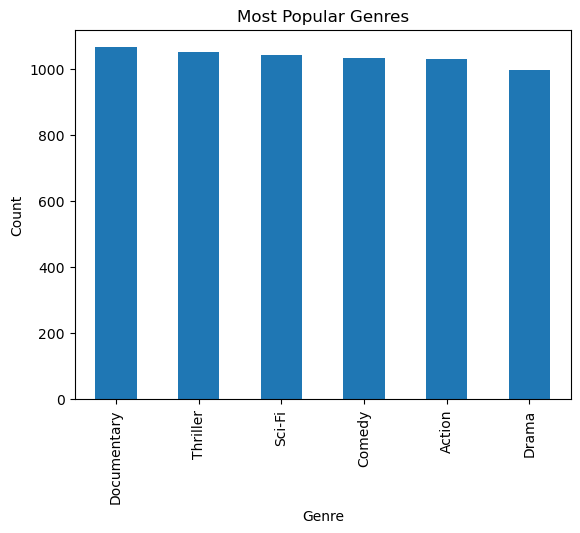

In [8]:
# Identifying the most popular genres

# Assuming 'Genre' is the column containing genre information
genre_counts = df['Genre'].value_counts()

# Print the most popular genres
print("Most popular genres:")
print(genre_counts)


import matplotlib.pyplot as plt

# Plot the most popular genres
genre_counts.plot(kind='bar')
plt.title('Most Popular Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()


### Highest Rated Netflix Genres

In [9]:
# Filter out rows with zero ratings
filtered_df = df[df['Ratings'] > 0]

# Group by 'Genre' and get the 'Ratings' for each group
genre_ratings = filtered_df.groupby('Genre')['Ratings'].mean().reset_index()

# Print the DataFrame with genres and their mean ratings
print(genre_ratings)

         Genre   Ratings
0       Action  3.041748
1       Comedy  3.013553
2  Documentary  2.928638
3        Drama  3.016080
4       Sci-Fi  2.962536
5     Thriller  2.965714


### Genres with the Highest Watch Time

In [10]:
print(df["Duration_Watched_minutes"])

0       90.04452533
1       68.97347929
2       42.51134326
3       53.31666005
4       69.43778589
           ...     
6209    21.11390104
6210    62.51439094
6211    105.5163892
6212     38.9636122
6213    78.48363126
Name: Duration_Watched_minutes, Length: 6214, dtype: object


In [11]:
# Check the data type of the 'Duration_Watched_minutes' column
column_data_type = filtered_df['Duration_Watched_minutes'].dtypes

# Print the data type
print(column_data_type)


object


In [12]:
# Convert 'Duration_Watched_minutes' to numeric
filtered_df['Duration_Watched_minutes'] = pd.to_numeric(filtered_df['Duration_Watched_minutes'], errors='coerce')

# Group by 'Genre' and get the mean of 'Duration_Watched_minutes'
genre_ratings = filtered_df.groupby('Genre')['Duration_Watched_minutes'].mean().reset_index()

# Print the DataFrame with genres and their mean ratings
print(genre_ratings)



         Genre  Duration_Watched_minutes
0       Action                 60.164136
1       Comedy                 58.563143
2  Documentary                 62.049858
3        Drama                 60.714402
4       Sci-Fi                 59.993830
5     Thriller                 60.741918


In [13]:


# Group by 'Genre' and get the 'Ratings' for each group
genre_watched = filtered_df.groupby('Genre')['Duration_Watched_minutes'].mean().reset_index()

# Print the DataFrame with genres and their mean ratings
print(genre_ratings)

         Genre  Duration_Watched_minutes
0       Action                 60.164136
1       Comedy                 58.563143
2  Documentary                 62.049858
3        Drama                 60.714402
4       Sci-Fi                 59.993830
5     Thriller                 60.741918


Ideas

- Choose the most popular genre by the highest average watch time
- Choose the most popular genre by highest ratings 

In [14]:
filtered_df['Duration_Watched_minutes'] = pd.to_numeric(filtered_df['Duration_Watched_minutes'], errors='coerce')

# Convert 'Duration_Watched_minutes' to numeric
filtered_df['Duration_Watched_minutes'] = pd.to_numeric(filtered_df['Duration_Watched_minutes'], errors='coerce')

# Group by 'Genre' and get the mean of 'Duration_Watched_minutes'
genre_ratings = filtered_df.groupby('Genre')['Duration_Watched_minutes'].mean().reset_index()

# Print the DataFrame with genres and their mean ratings
print(genre_ratings)


         Genre  Duration_Watched_minutes
0       Action                 60.164136
1       Comedy                 58.563143
2  Documentary                 62.049858
3        Drama                 60.714402
4       Sci-Fi                 59.993830
5     Thriller                 60.741918


In [15]:
print(df.Ratings)

0       3
1       3
2       3
3       2
4       4
       ..
6209    3
6210    4
6211    5
6212    5
6213    4
Name: Ratings, Length: 6214, dtype: int32


In [16]:
# User demographics, analyze age, gender, and location to understand the audience profile.

In [17]:
# Analyzing the types of devices people use netflix with 

In [18]:
# Analyze the viewing duration, what is the average, what do people watch the most?

In [19]:
# Geographic Trends

# Explore user activity based on geographic location to identify regional content preferences or target specific regions for content promotions.

Ideas to Improve Code

Functions

Notes of What I have Learned

- Always know what are all the options that a column can have for a value
- Always know the data type that the values of the column you are working with are, ex. make sure numbers are not strings
- Do not make a column of numbers a string in the database lol
- Check datatypes of dataframe after creating it from tuples converted to arrays to df